# **My summary of paper devoted on image segmentation investigation**

Among the big variety of techniques used for image segmentation over the years such as thresholding [1], relaxation [2], Markov Random Field based approaches [3], surface based segmentation [4] [5] , edge detection [6], methods based on fuzzy set theory [7] and others, neural network based approaches proved to be the most promising and successful. Convolutional neural networks (CNN) and fully convolutional networks (FCN), especially U-Net, are driving advances. CNN is a multi-layer neural network containing convolution, pooling, activation and fully connected layers. CNN for handwritten character recognition was first introduced in 1989 be LeCun and named LeNet [8], [9]. Since 2012, a few other networks based on CNN architecture and widely used for image classification and segmentation were proposed (AlexNet [10], ZFNet [11], GoogleNet [12], Residual Net [13], DenseNet [14], VGGNet [15]).  These classification networks can be adapted into FCN which are able to efficiently learn to make dense predictions for per-pixel tasks like semantic segmentation [16]. For example, U-net architecture achieves very good performance on very different biomedical segmentation applications [17].

[1]	A. K. Jaln, “Segmentation of Document Images,” IEEE Trans. Pattern Anal. Mach. Intell., vol. I, no. 12, pp. 1322–1329, 1989.
[2]	R. A., A. Rosenfeld, and A. Hummel, “Scene Labeling by Relaxation Operations,” Cybernetics, no. 6, pp. 420–433, 1976.
[3]	A. K. Jain, “Advances in Mathematical Models for Image Processing,” Proc. IEEE, vol. 69, no. 5, pp. 502–528, 1981.
[4]	P. J. Besl and R. C. Jain, “Segmentation Through Variable-Order Surface Fitting,” IEEE Trans. Pattern Anal. Mach. Intell., vol. 10, no. 2, pp. 167–192, 1988.
[5]	N. Yokoya and M. D. Levine, “Range Image Segmentation Based on Differential Geometry: A Hybrid Approach,” IEEE Trans. Pattern Anal. Mach. Intell., vol. 11, no. 6, pp. 643–649, 1989.
[6]	J. Canny, “A Computational Approach to Edge Detection,” IEEE Trans. Pattern Anal. Mach. Intell., no. 6, pp. 679–698, 1986.
[7]	J. C. Bezdek, J. Keller, R. Krisnapuram, and N. R. Pal, Fuzzy models and algorithms for pattern recognition and image processing. 2005.
[8]	Y. LeCun et al., “Backpropagation applied to digit recognition,” Neural computation, vol. 1, no. 4. pp. 541–551, 1989.
[9]	Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner, “Gradient-based learning applied to document recognition,” Proc. IEEE, vol. 86, no. 11, pp. 2278–2323, 1998.
[10]	G. H. A Krizhevsky, I Sutskever, “ImageNet Classification with Deep Convolutional Neural Networks,” Adv. neural Inf. Process. Syst. Adv. neural Inf. Process. Syst., pp. 1097–1105, 2012.
[11]	M. D. Zeiler and R. Fergus, “Visualizing and understanding convolutional networks,” Lect. Notes Comput. Sci. (including Subser. Lect. Notes Artif. Intell. Lect. Notes Bioinformatics), vol. 8689 LNCS, no. PART 1, pp. 818–833, 2014.
[12]	A. R. C. Szegedy, W. Liu, Y. Jia, P. Sermanet, S. Reed, D. Anguelov, D. Erhan, V. Vanhoucke, “Going Deeper with Convolutions,” Proc. IEEE Conf. Comput. Vis. pattern Recognit., pp. 1–9, 2015.
[13]	K. He, X. Zhang, S. Ren, and J. Sun, “Identity mappings in deep residual networks,” Lect. Notes Comput. Sci. (including Subser. Lect. Notes Artif. Intell. Lect. Notes Bioinformatics), vol. 9908 LNCS, pp. 630–645, 2016.
[14]	K. Q. W. G. Huang, Z. Liu, L. Van Der Maaten, “Densely Connected Convolutional Networks,” Proc. IEEE Conf. Comput. Vis. pattern Recognit., pp. 4700–4708, 2017.
[15]	K. Simonyan and A. Zisserman, “Very deep convolutional networks for large-scale image recognition,” 3rd Int. Conf. Learn. Represent. ICLR 2015 - Conf. Track Proc., pp. 1–14, 2015.
[16]	Y. Zhang, Z. Qiu, T. Yao, D. Liu, and T. Mei, “Fully Convolutional Adaptation Networks for Semantic Segmentation,” Proc. IEEE Comput. Soc. Conf. Comput. Vis. Pattern Recognit., pp. 6810–6818, 2018.
[17]	O. Ronneberger, P. Fischer, and T. Brox, “U-net: Convolutional networks for biomedical image segmentation,” Lect. Notes Comput. Sci. (including Subser. Lect. Notes Artif. Intell. Lect. Notes Bioinformatics), vol. 9351, pp. 234–241, 2015.


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from glob import glob
import cv2
import json
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [0]:
os.getcwd()
os.chdir("/content/drive/My Drive/Colab Notebooks/cig_butts")
print(os.getcwd())
path = os.getcwd()

/content/drive/My Drive/Colab Notebooks/cig_butts


In [0]:
os.listdir(f"{path}/train")

['images', 'coco_annotations.json']

In [0]:
images = os.listdir(f"{path}/train/images")
with open(f"{path}/train/coco_annotations.json", "r") as file_json:
    annotations = json.load(file_json)
print(annotations)

{'info': {'description': 'ImmersiveLimit Cigarette Butt Dataset', 'url': 'http://www.immersivelimit.com', 'version': '0.1', 'year': 2018, 'contributor': 'Adam Kelly', 'date_created': '2018/07/27'}, 'licenses': [{'url': 'http://www.immersivelimit.com/noncommercial-educational-license-agreement', 'id': 0, 'name': 'ImmersiveLimit.com Non-Commercial, Educational License Agreement'}], 'images': [{'license': 0, 'file_name': '00000000.jpg', 'width': 512, 'height': 512, 'id': 0}, {'license': 0, 'file_name': '00000001.jpg', 'width': 512, 'height': 512, 'id': 1}, {'license': 0, 'file_name': '00000002.jpg', 'width': 512, 'height': 512, 'id': 2}, {'license': 0, 'file_name': '00000003.jpg', 'width': 512, 'height': 512, 'id': 3}, {'license': 0, 'file_name': '00000004.jpg', 'width': 512, 'height': 512, 'id': 4}, {'license': 0, 'file_name': '00000005.jpg', 'width': 512, 'height': 512, 'id': 5}, {'license': 0, 'file_name': '00000006.jpg', 'width': 512, 'height': 512, 'id': 6}, {'license': 0, 'file_name

In [0]:
print(type(annotations))
print(len(annotations))
print(annotations.keys())
print(annotations["images"])
print(type(annotations["annotations"]))
print(len(annotations["annotations"]))
print(type(annotations["annotations"][196]))
print(annotations["annotations"][196].keys())
print(annotations["annotations"][196]['segmentation'][0])

<class 'dict'>
5
dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
[{'license': 0, 'file_name': '00000000.jpg', 'width': 512, 'height': 512, 'id': 0}, {'license': 0, 'file_name': '00000001.jpg', 'width': 512, 'height': 512, 'id': 1}, {'license': 0, 'file_name': '00000002.jpg', 'width': 512, 'height': 512, 'id': 2}, {'license': 0, 'file_name': '00000003.jpg', 'width': 512, 'height': 512, 'id': 3}, {'license': 0, 'file_name': '00000004.jpg', 'width': 512, 'height': 512, 'id': 4}, {'license': 0, 'file_name': '00000005.jpg', 'width': 512, 'height': 512, 'id': 5}, {'license': 0, 'file_name': '00000006.jpg', 'width': 512, 'height': 512, 'id': 6}, {'license': 0, 'file_name': '00000007.jpg', 'width': 512, 'height': 512, 'id': 7}, {'license': 0, 'file_name': '00000008.jpg', 'width': 512, 'height': 512, 'id': 8}, {'license': 0, 'file_name': '00000009.jpg', 'width': 512, 'height': 512, 'id': 9}, {'license': 0, 'file_name': '00000010.jpg', 'width': 512, 'height': 512, 'id': 10

In [0]:
annotations["images"][198]["width"]

512

In [0]:
for i in range(len(annotations["images"])):
  if i != annotations["images"][i]["id"]:
    print(i)
#Проверяем что в аннотациях везде сходится порядковый номер словаря в списке annotations["images"] и значение в данном словаре по ключу "id" (Вынести в докстринг)

In [0]:
w, h = annotations["images"][196]['width'], annotations["images"][196]['height']
w, h

(512, 512)

In [0]:
z = np.zeros((h,w)).astype(np.uint8)

In [0]:
q = np.array(annotations["annotations"][196]['segmentation'][0]).reshape(-1,2).astype(np.int32)
q

array([[364, 292],
       [376, 290],
       [378, 288],
       ...,
       [352, 288],
       [355, 290],
       [364, 292]], dtype=int32)

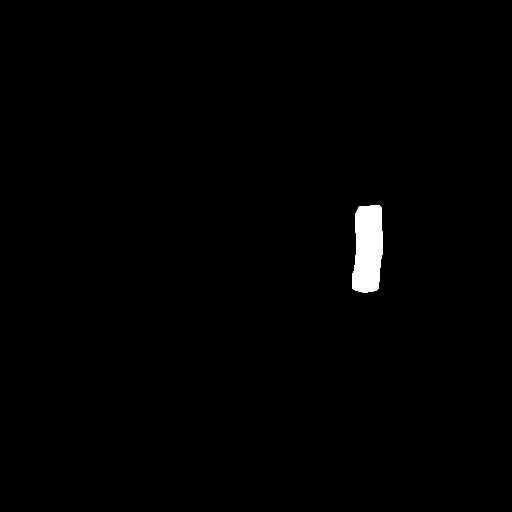

In [0]:
mask = np.zeros((4, 3))
np.set_printoptions(threshold = 10)
cv2.fillPoly(z, [q], 255)
im = Image.fromarray(z)
im

In [0]:
#q = np.array([(2,2), (2,11),(11,2),(11,11)], 'int32')
#r = np.array([[0,0], [0,11], [3,11], [3,0]], 'int32')
#Важен порядок написания списков в массиве для дальнейшей маски
#z = np.zeros((512,512)).astype(np.uint8)
#np.set_printoptions(threshold = 1000000)
#cv2.fillPoly(z, [q, r], 1).T
#z
#im = Image.fromarray(z)
#im

In [0]:
images

In [0]:
images[2]

'00000999.jpg'

In [0]:
img_id = int(np.random.choice(images).split(".")[0])
print(img_id)

444


In [0]:
f"{img_id:08}"

'00000444'

In [0]:
image = Image.open(f"{path}/train/images/{img_id:08}.jpg")

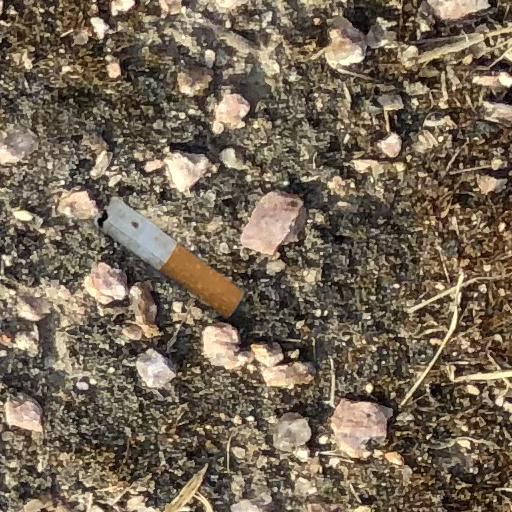

In [0]:
image

In [0]:
img = np.array(image)

In [0]:
X1_train = []
X1_train.append(img)
X1_train.append(img)
X1_train = np.array(X1_train)
(X1_train/255.0).astype(np.float32)

In [0]:
img.shape

(512, 512, 3)

Получение маски


In [0]:
#ax1, ax2 = plt.subplots(1,2, figsize = (14,8))
#ax1.title("test")

In [0]:
X_train = []
Y_train = []
count = 0
for i in images:
  img_id = int(i.split(".")[0])
  image = Image.open(f"{path}/train/images/{img_id:08}.jpg")
  img = np.array(image).astype(np.uint8)
  X_train.append(img)
  z = np.zeros((h,w)).astype(np.uint8)
  q = np.array(annotations["annotations"][img_id]['segmentation'][0]).reshape(-1,2).astype(np.int32)
  mask = cv2.fillPoly(z, [q], 255).reshape(512, 512, 1)
  Y_train.append(mask)
  count += 1
  if count == 500:
    break

In [0]:
def encode_rle(mask):
    """Returns encoded mask (run length) as a string.
    Parameters
    ----------
    mask : np.ndarray, 2d
        Mask that consists of 2 unique values: 0 - denotes background, 1 - denotes object.
    Returns
    -------
    str
        Encoded mask.
    Notes
    -----
    Mask should contains only 2 unique values, one of them must be 0, another value, that denotes
    object, could be different from 1 (for example 255).
    """
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]

    return ' '.join(str(x) for x in runs)
import pandas as pd    
dict_for_csv = {"img_id" : [], "rle_mask" : []}
images_valid = os.listdir("/content/drive/My Drive/Colab Notebooks/cig_butts/val/images")
with open("/content/drive/My Drive/Colab Notebooks/cig_butts/val/coco_annotations.json", "r") as file_json:
    annotations_valid = json.load(file_json)
for i in images_valid:
  img_id = int(i.split(".")[0])
  z = np.zeros((h,w)).astype(np.uint8)
  q = np.array(annotations_valid["annotations"][img_id]['segmentation'][0]).reshape(-1,2).astype(np.int32)
  mask = cv2.fillPoly(z, [q], 255).reshape(512, 512)
  dict_for_csv["img_id"].append(img_id)
  dict_for_csv["rle_mask"].append(encode_rle(mask))
DF = pd.DataFrame.from_dict(dict_for_csv)

In [129]:
DF

,img_id,rle_mask
0,0,73565 6 74076 9 74586 13 75094 19 75603 24 761...
1,2,47861 1 48371 4 48881 7 49392 9 49903 12 50415...
2,1,90785 7 91294 15 91804 18 92315 20 92826 22 93...
3,9,128725 2 129236 5 129747 8 130258 11 130274 5 ...
4,8,61032 3 61542 9 62053 13 62565 15 63076 18 635...
...,...,...
195,194,16730 7 17240 11 17750 16 18260 20 18771 23 19...
196,199,193769 10 194280 13 194791 16 195302 18 195814...
197,198,64595 3 65106 6 65616 9 66127 11 66638 13 6715...
198,197,175358 4 175869 11 175886 8 176380 35 176891 4...


In [139]:
DF1 = DF.sort_values(by = ["img_id"])
DF1

,img_id,rle_mask
0,0,73565 6 74076 9 74586 13 75094 19 75603 24 761...
2,1,90785 7 91294 15 91804 18 92315 20 92826 22 93...
1,2,47861 1 48371 4 48881 7 49392 9 49903 12 50415...
9,3,23796 9 24304 13 24811 18 25318 23 25826 28 26...
6,4,156992 1 157502 4 158013 6 158524 8 159034 10 ...
...,...,...
194,195,119466 12 119977 28 120488 38 120999 42 121510...
199,196,104929 1 105439 4 105949 6 106459 9 106966 15 ...
198,197,175358 4 175869 11 175886 8 176380 35 176891 4...
197,198,64595 3 65106 6 65616 9 66127 11 66638 13 6715...


In [0]:
Final_DF = DF1.reset_index(drop=True)

In [143]:
Final_DF

,img_id,rle_mask
0,0,73565 6 74076 9 74586 13 75094 19 75603 24 761...
1,1,90785 7 91294 15 91804 18 92315 20 92826 22 93...
2,2,47861 1 48371 4 48881 7 49392 9 49903 12 50415...
3,3,23796 9 24304 13 24811 18 25318 23 25826 28 26...
4,4,156992 1 157502 4 158013 6 158524 8 159034 10 ...
...,...,...
195,195,119466 12 119977 28 120488 38 120999 42 121510...
196,196,104929 1 105439 4 105949 6 106459 9 106966 15 ...
197,197,175358 4 175869 11 175886 8 176380 35 176891 4...
198,198,64595 3 65106 6 65616 9 66127 11 66638 13 6715...


In [0]:
Final_DF.to_csv("pred_val_template.csv.csv", sep=',', encoding='utf-8')

In [123]:
import pandas as pd
dict_for_csv = {}
dict_for_csv["img_id"] = [1, 2, 3, 4, 5]
dict_for_csv["rle"] = ["rle1", "rle2", "rle3", "rle4", "rle5"]
pd.DataFrame.from_dict(dict_for_csv)

,img_id,rle
0,1,rle1
1,2,rle2
2,3,rle3
3,4,rle4
4,5,rle5


In [0]:
X_train_array = np.array(X_train)/255.0
print(X_train_array.shape)
Y_train_array = np.array(Y_train)/255.0
Y_train_array
X_train_array*255.0

In [0]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [0]:
import os
import sys
import random

import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [0]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((512, 512, 3))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [0]:
EPS = 1e-10

def test_metrics(true, pred):
  true = tf.convert_to_tensor(true)
  pred = tf.convert_to_tensor(pred)
  return(true - pred)

def dice(true, pred):
    """Dice score.
    Parameters
    ----------
    true : np.ndarray, 2d
         Ground truth mask that consists of 2 unique values: 0 - denotes background,
         1 - denotes object.
    pred : np.ndarray, 2d
         Predicted mask that consists of 2 unique values: 0 - denotes background,
         1 - denotes object.
    Returns
    -------
    float from 0 to 1
        Dice score. The greater the value of dice score the better.
    Notes
    -----
    Masks should contains only 2 unique values, one of them must be 0, another value, that denotes
    object, could be different from 1 (for example 255).
    """
    true = true.numpy().reshape(512,512)
    pred = pred.numpy().reshape(512,512)

    true = true.astype(bool)
    pred = pred.astype(bool)

    intersection = (true & pred).sum()
    im_sum = true.sum() + pred.sum()

    return 2.0 * intersection / (im_sum + EPS)


def get_dice(true, pred):
    """Mean dice score.
    Parameters
    ----------
    true : list[np.ndarray] or np.ndarray
         List of ground truth masks or one mask that consists of 2 unique values:
         0 - denotes background, 1 - denotes object.
    pred : list[np.ndarray] or np.ndarray
         List of predicted masks or one mask that consists of 2 unique values:
         0 - denotes background, 1 - denotes object.
    Returns
    -------
    float from 0 to 1
        Dice score or mean dice score in case then lists of masks are passed.
        The greater the value of dice score the better.
    Notes
    -----
    Masks should contains only 2 unique values, one of them must be 0, another value, that denotes
    object, could be different from 1 (for example 255).
    
    """
    true = true.numpy().reshape(512,512)
    pred = pred.numpy().reshape(512,512)
    assert type(true) == type(pred), "Types of true and pred should be the same."
    if isinstance(true, list):
        return np.mean([dice(t, p) for t, p in zip(true, pred)])
    elif isinstance(true, np.ndarray):
        return dice(true, pred)
    else:
        raise TypeError("Wrong type.")
import keras.backend as K
def dice_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

In [0]:
def encode_rle(mask):
    """Returns encoded mask (run length) as a string.
    Parameters
    ----------
    mask : np.ndarray, 2d
        Mask that consists of 2 unique values: 0 - denotes background, 1 - denotes object.
    Returns
    -------
    str
        Encoded mask.
    Notes
    -----
    Mask should contains only 2 unique values, one of them must be 0, another value, that denotes
    object, could be different from 1 (for example 255).
    """
    pixels = mask.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]

    return ' '.join(str(x) for x in runs)

rle_mask = encode_rle(mask)
rle_mask

In [0]:
model = UNet()
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=[dice_coef])
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv2d_209 (Conv2D)             (None, 512, 512, 16) 448         input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_210 (Conv2D)             (None, 512, 512, 16) 2320        conv2d_209[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_44 (MaxPooling2D) (None, 256, 256, 16) 0           conv2d_210[0][0]                 
___________________________________________________________________________________________

In [0]:
model.fit(X_train_array, Y_train_array, validation_split = 0.1, batch_size = 10, epochs = 3, shuffle = True, verbose = 2)

Train on 450 samples, validate on 50 samples
Epoch 1/3
450/450 - 12s - loss: 0.1090 - dice_coef: 0.0061 - val_loss: 0.0481 - val_dice_coef: 0.0113
Epoch 2/3
450/450 - 11s - loss: 0.0478 - dice_coef: 0.0252 - val_loss: 0.0486 - val_dice_coef: 0.0308
Epoch 3/3
450/450 - 11s - loss: 0.0419 - dice_coef: 0.0588 - val_loss: 0.0471 - val_dice_coef: 0.0676


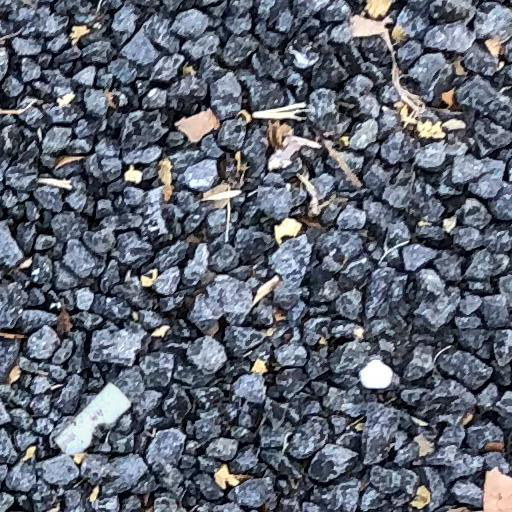

In [0]:
Image.fromarray((X_train_array[22]*255).astype(np.uint8))

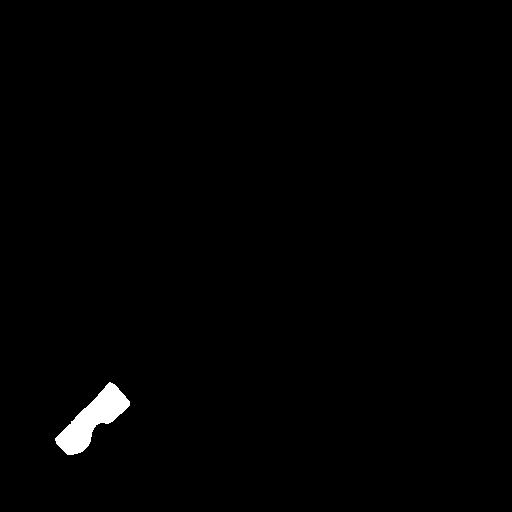

In [0]:
Image.fromarray((Y_train_array[22]*255).reshape(512,512).astype(np.uint8))

In [0]:
images_test = os.listdir("/content/drive/My Drive/Colab Notebooks/cig_butts/real_test")

In [0]:
X_test = []
for i in images_test:
  image = Image.open(f"/content/drive/My Drive/Colab Notebooks/cig_butts/real_test/{i}")
  img = np.array(image)
  X_test.append(img)

In [0]:
X_test_array = np.array(X_test)
X_test_array.shape

(10, 512, 512, 3)

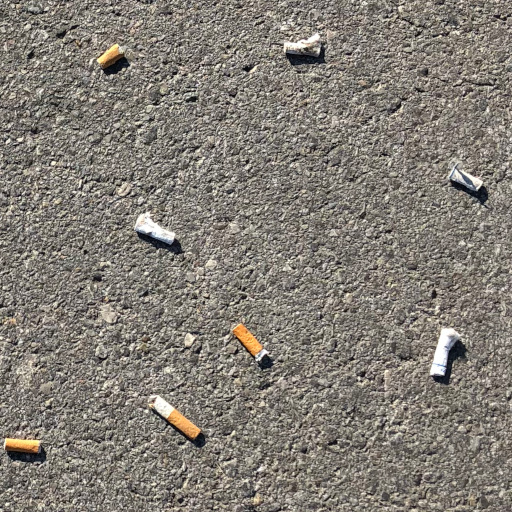

In [0]:
Image.fromarray(X_test_array[8])

In [0]:
Y_test = model.predict((X_test_array/255.0), batch_size=10, verbose = 0)

In [0]:
Y_test.shape

(10, 512, 512, 1)

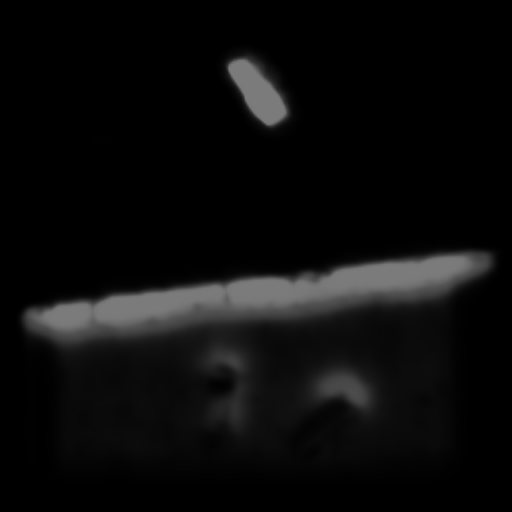

In [0]:
Image.fromarray((Y_test[0]*255.0).reshape(512,512).astype(np.uint8))


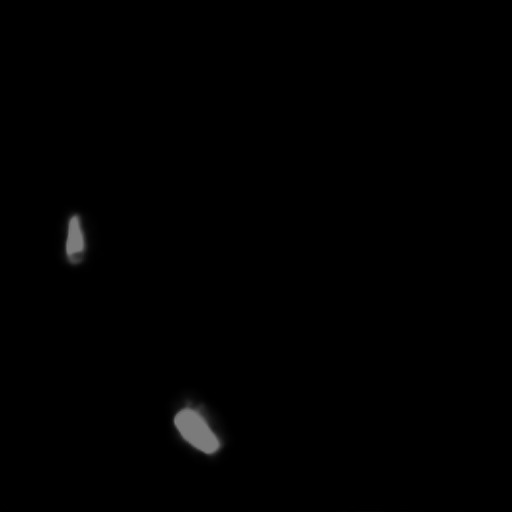

In [0]:
Image.fromarray((Y_test[1]*255.0).reshape(512,512).astype(np.uint8))

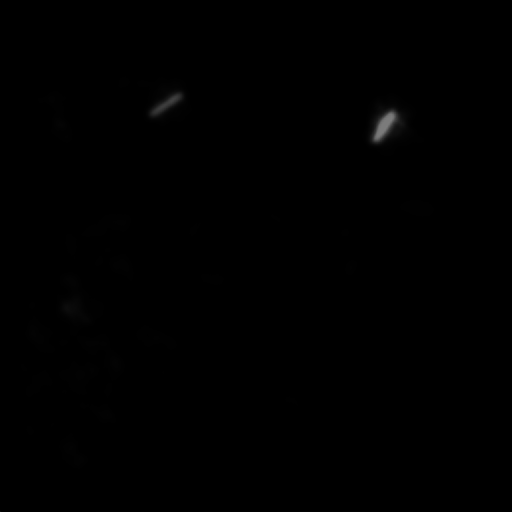

In [0]:
Image.fromarray((Y_test[2]*255.0).reshape(512,512).astype(np.uint8))

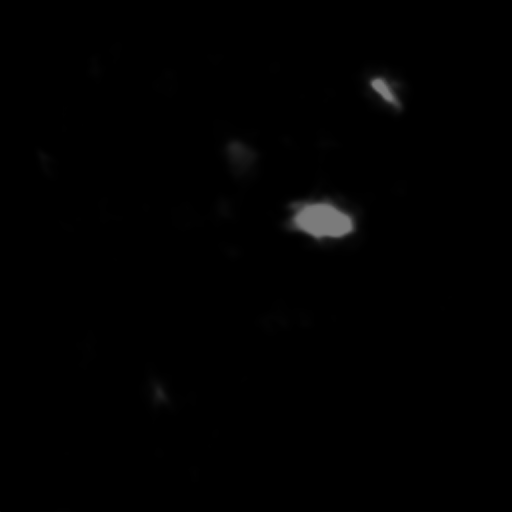

In [0]:
Image.fromarray((Y_test[3]*255.0).reshape(512,512).astype(np.uint8))

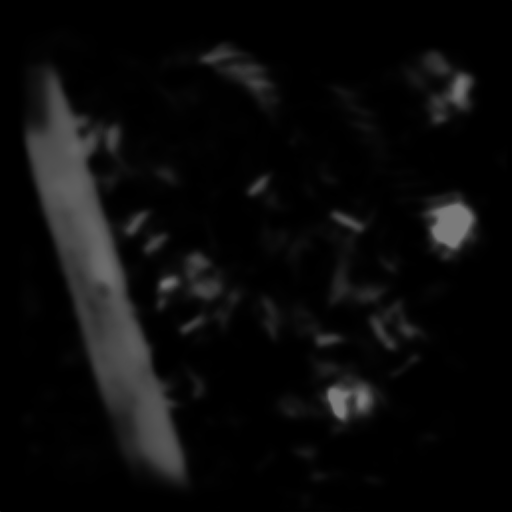

In [0]:
Image.fromarray((Y_test[4]*255.0).reshape(512,512).astype(np.uint8))

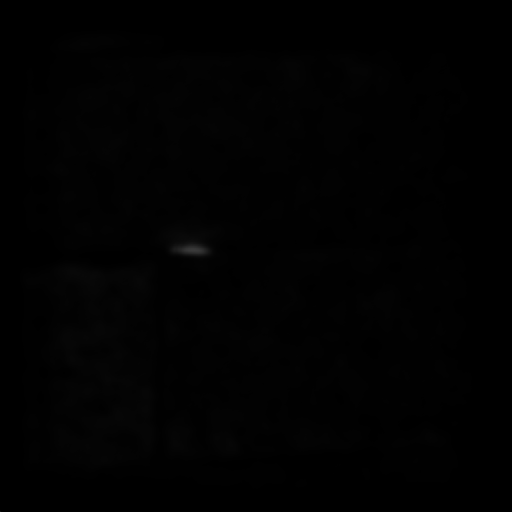

In [0]:
Image.fromarray((Y_test[5]*255.0).reshape(512,512).astype(np.uint8))

In [0]:
Image.fromarray((Y_test[6]*255.0).reshape(512,512).astype(np.uint8))

In [0]:
Image.fromarray((Y_test[7]*255.0).reshape(512,512).astype(np.uint8))

In [0]:
Image.fromarray((Y_test[8]*255.0).reshape(512,512).astype(np.uint8))

In [0]:
Image.fromarray((Y_test[9]*255.0).reshape(512,512).astype(np.uint8))

In [0]:
Image.fromarray(X_test_array[0])

In [0]:
Image.fromarray(X_test_array[1])

In [0]:
Image.fromarray(X_test_array[2])

In [0]:
Image.fromarray(X_test_array[3])

In [0]:
Image.fromarray(X_test_array[4])

In [0]:
Image.fromarray(X_test_array[5])

In [0]:
Image.fromarray(X_test_array[6])

In [0]:
Image.fromarray(X_test_array[7])

In [0]:
Image.fromarray(X_test_array[8])

In [0]:
Image.fromarray(X_test_array[9])